# Wstęp

Jako projekt wybrałem klasyfikację na bazie danych obrazkowej, na podstawie zdjęć samolotów militarnych z bazy danych z kaggle pod tytułem "Military Aircraft Detection Dataset". W tym zadaniu staram się wytrenować algorytm do przydzielenia odpowiedniej nazwy do samolotu.

## Baza Danych i Preprocessing

https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset/data

Zbiór danych zawiera 49 różnych typów pojazdów lotniczych, z niektórymi skupionymi w jednej klasie wraz z ich podtypami. Zdjęć jest łącznie 23654.
Poniżej dokonuję podziału na datasety treningowe i walidacyjne z tasowaniem. Jednocześnie konwertuję też obrazy na rozmiar 128 x 128 pikseli dla ułatwienia uczenia.

![image](./notes/im1.png)

![image](./notes/im2.png)

Poniżej przykładowa zawartość zbioru:
![image](./notes/output.png)

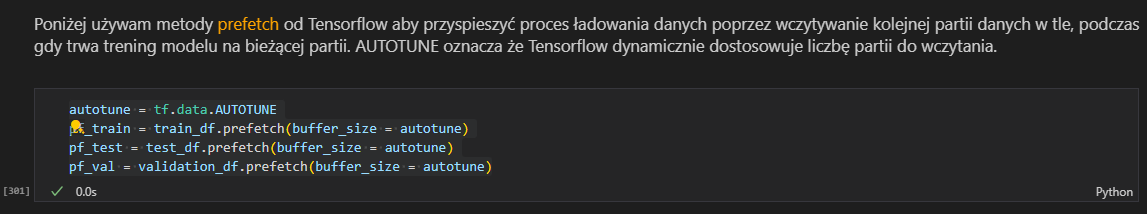

Baza danych była starannie przygotowana, a więc nie musiałem przeprowadzać zaawansowanego preprocessingu na cele tego zadania, ponad przekonwertowanie zdjęć na mniejsze by usprawnić przetwarzanie.

## Klasyfikacja

Klasyfikację danych przeprowadziłem trzema metodami transfer learning: ResNet50, EfficientNetB3 i Xception
Dla wszystkich zastosowałem podobny schemat wartw uczenia.
* **GlobalAveragePooling2D**: oblicza średnią wartość dla każdej mapy cech na poziomie przestrzennym (wysokość i szerokość). Jest to sposób na redukcję wymiarowości map cech
  
* **Dense**: warstwa w pełni połączona, gdzie każdy neuron w warstwie jest połączony ze wszystkimi neuronami w poprzedniej warstwie. Jest często używana w sieciach neuronowych do wykonywania operacji liniowych i nieliniowych na danych
  
* **Dropout**: technika regularyzacji stosowana w sieciach neuronowych, która polega na losowym "wyłączaniu" (ustawianiu na zero) pewnej frakcji neuronów podczas treningu. Pomaga to zapobiegać przetrenowaniu modelu

* **RandomRotation** i **RandomFlip**: techniki augmentacji danych, które losowo obracają i odbijają obrazy, odpowiednio. Augmentacja danych pomaga zwiększyć różnorodność danych treningowych i zapobiegać przetrenowaniu

* **BatchNormalization**: technika normalizacji , która normalizuje aktywacje warstw na poziomie batchu (grupy). Pomaga to przyspieszyć trening i zwiększa stabilność sieci.


## Testowanie ResNet50


Dla tego modelu wykorzystałem optymalizator <span style="color:orange">Adamax</span>, wariant algorytmu Adam wykazujący większą stabilność w przypadku rzadkich parametrów. 

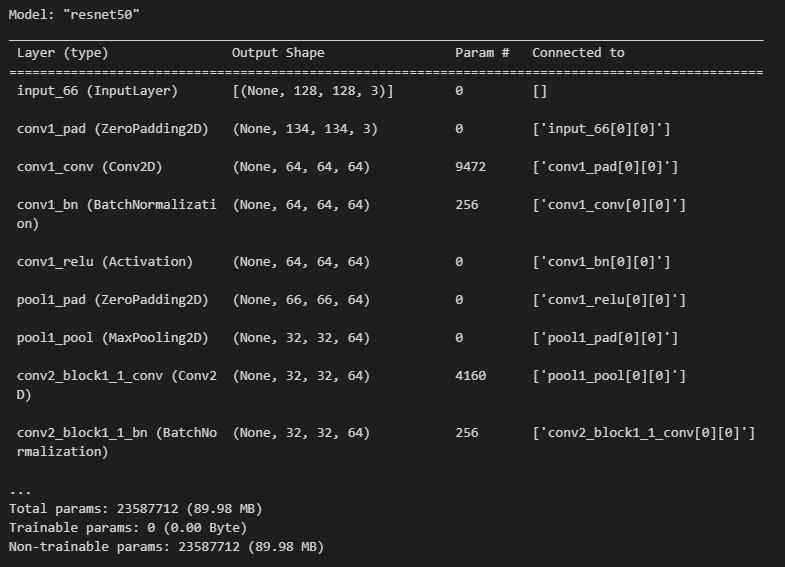

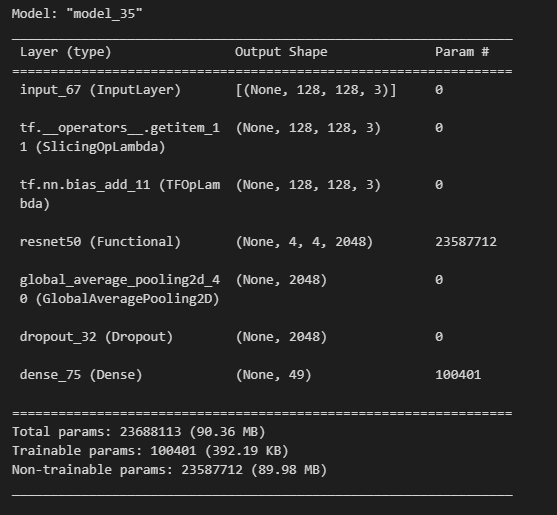

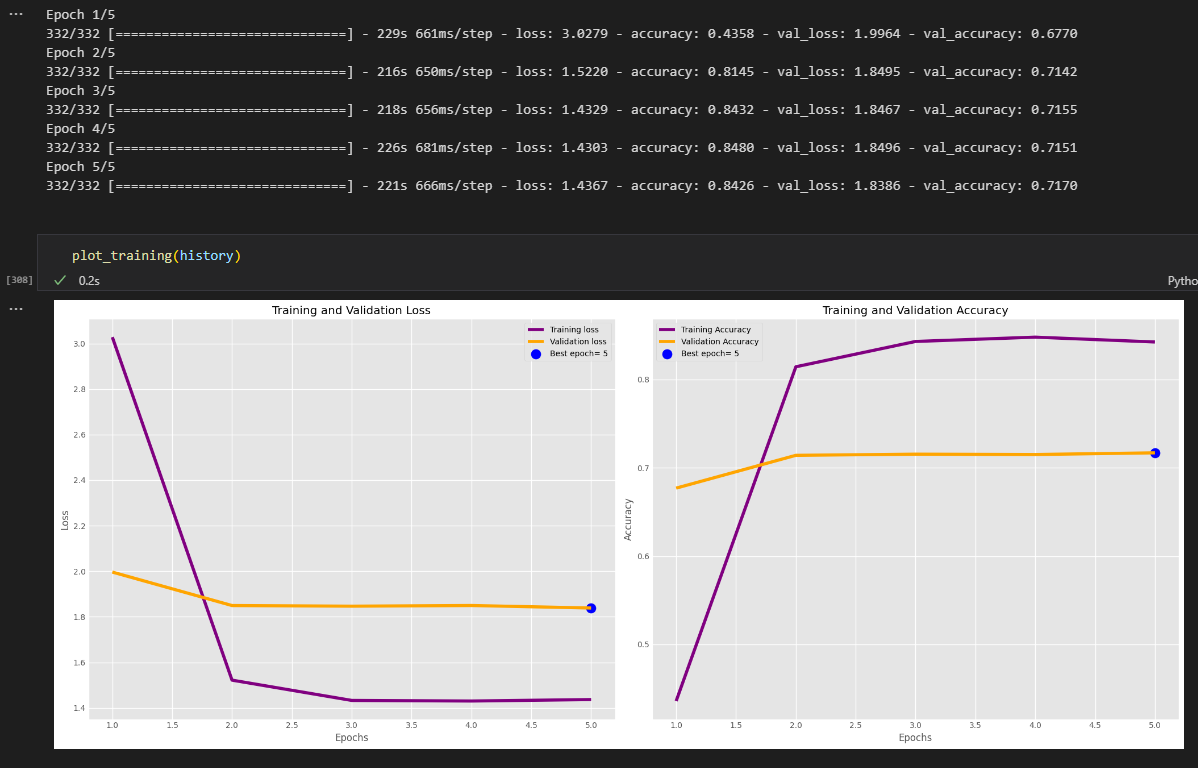

Z wykresu uczenia wynika, że model najprawdopodobniej był przetrenowany. Validation Accuracy osiągnęła maksimum na drugiej epoce i już znacznie nie rosła. Mimo wielu prób dostrojenia warstw i regularizatorów (w Dense) oraz callbacków EarlyStopping, to jednak ta konfiguracja zwracała najwyższe wyniki dokładności.

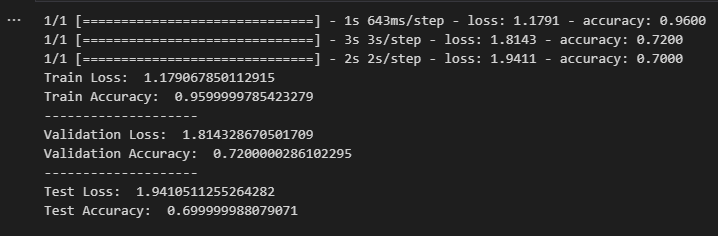

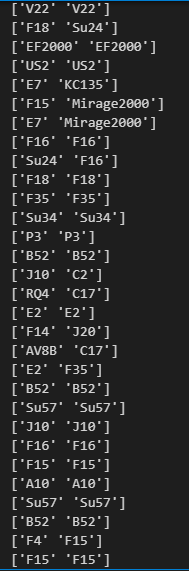

Podgląd na przykładowe próby klasyfikacji, można wyłapać błędy

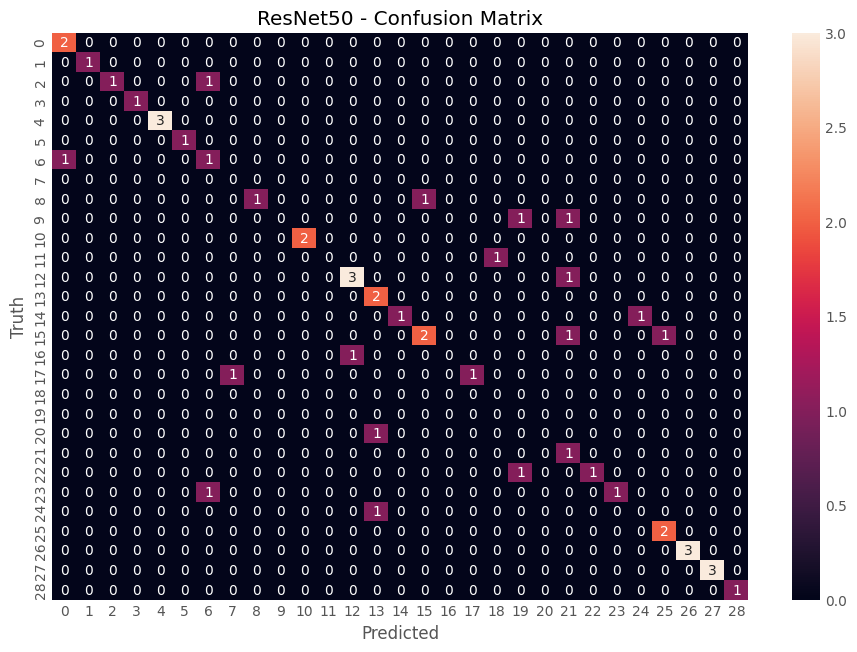

## Testowanie EfficientNetB3

Tu również wykorzystałem <span style="color:orange">Adamax</span>

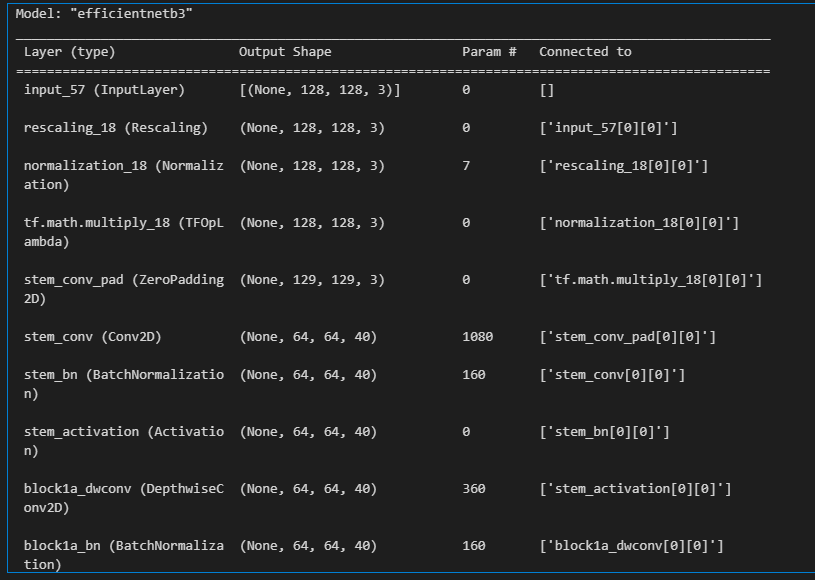

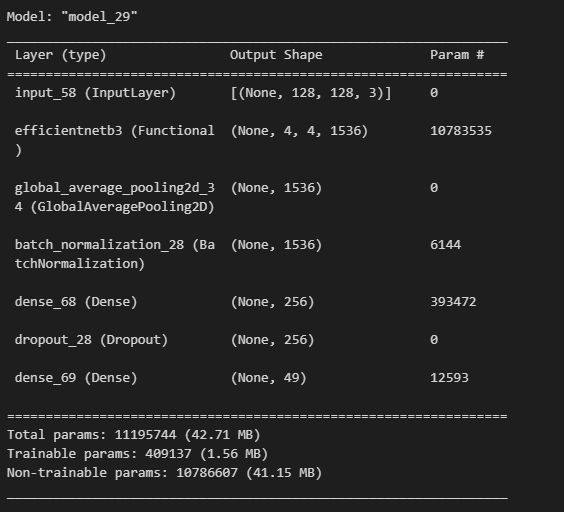

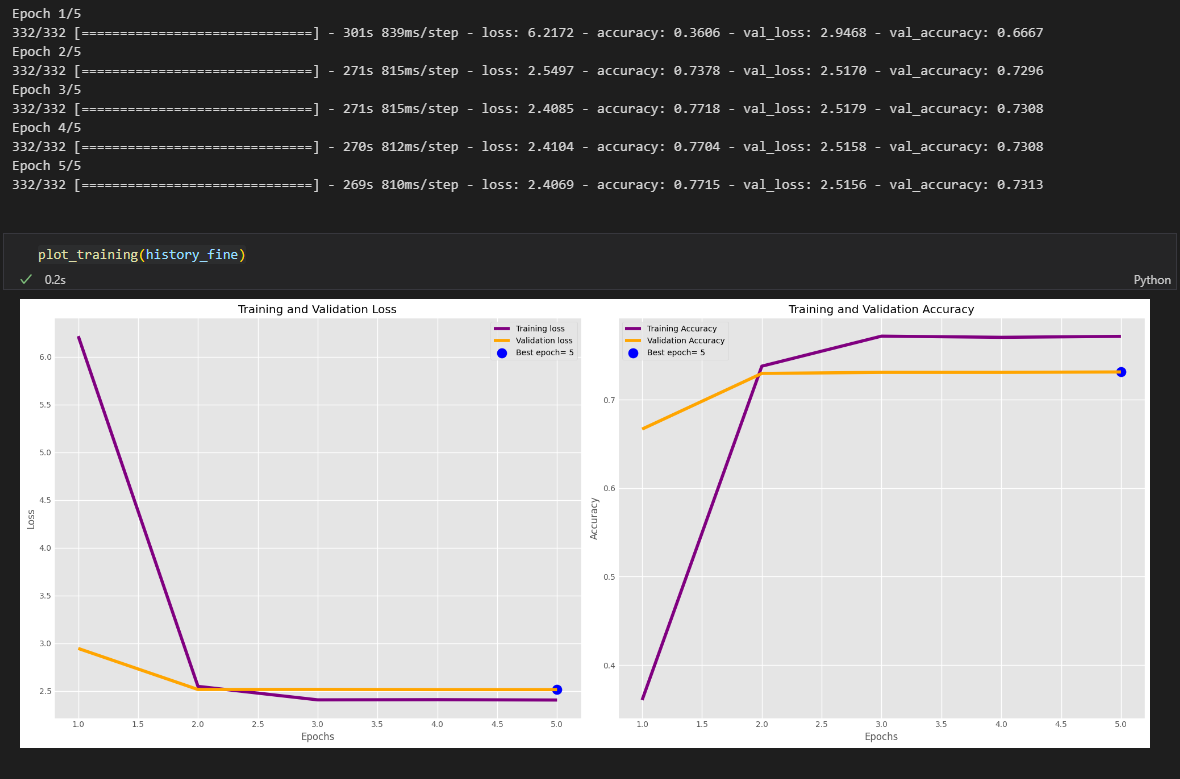

EfficientNetB3 zdecydowanie najlepiej wypadł dla tego zadania. Na wykresie jest widoczna poprawa jeśli chodzi o przeuczenie, co też przekłada się na dobry wynik dokładności

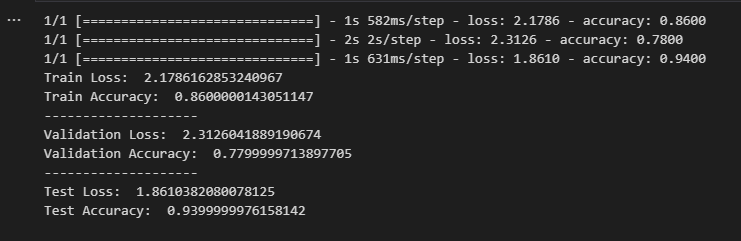

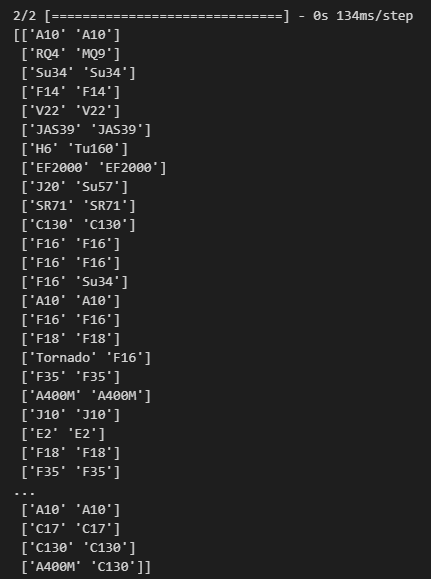

"Na oko" błędów również znacznie mniej.

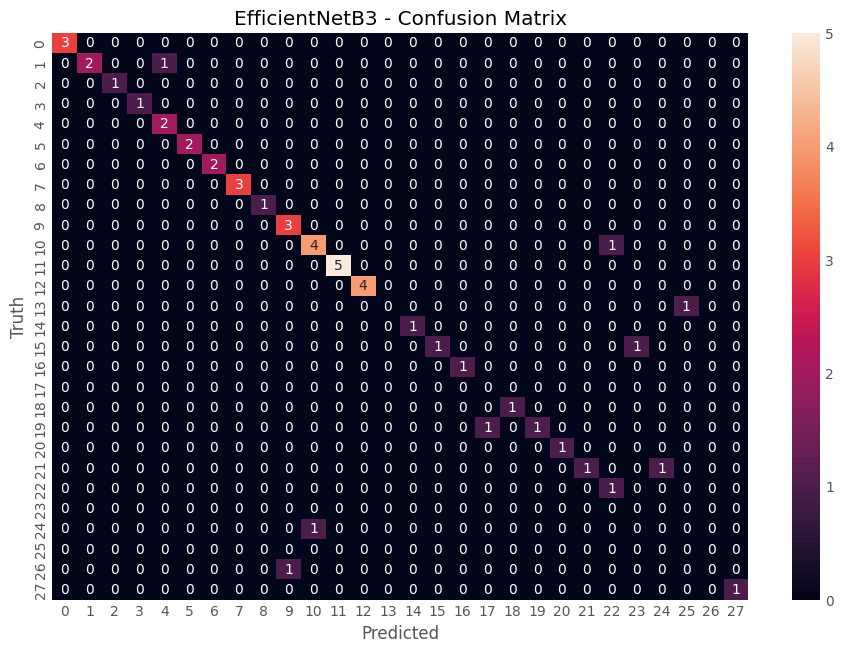

## Testowanie Xception

Dla tego modelu najlepsze wyniki przynosił optymalizator <span style="color:red">RMSprop</span> (Root Mean Square Propagation).
Modyfikacja algorytmu Adagrad, która rozwiązuje jego problem z szybkim zmniejszaniem się stopy uczenia. RMSprop robi to poprzez wprowadzenie hiperparametru zaniku, który kontroluje, jak szybko informacje o poprzednich gradientach są zapominane.


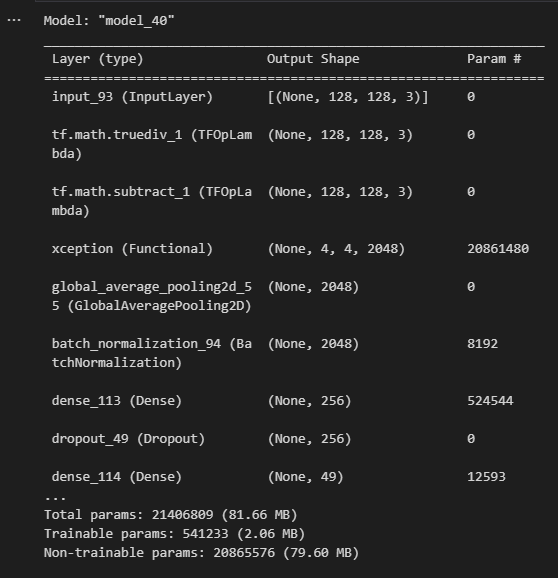

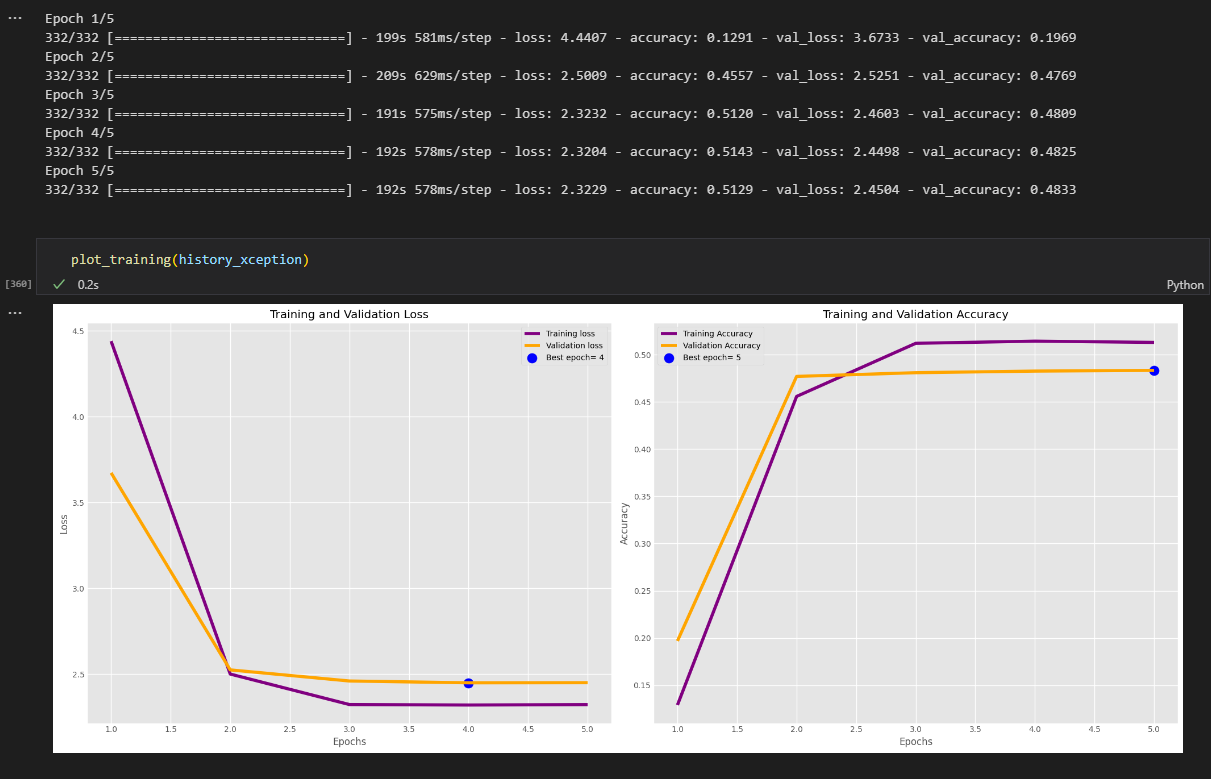

Niestety ten algorytm, mimo dobrego dopasowania stopnia uczenia, wartości dokładności okazały się najniższe ze wszystkich testowanych modeli.
Testowałem pozostawienie algorytmu z wieloma epokami, ale szybko dochodziło do wypłaszczenia danych.

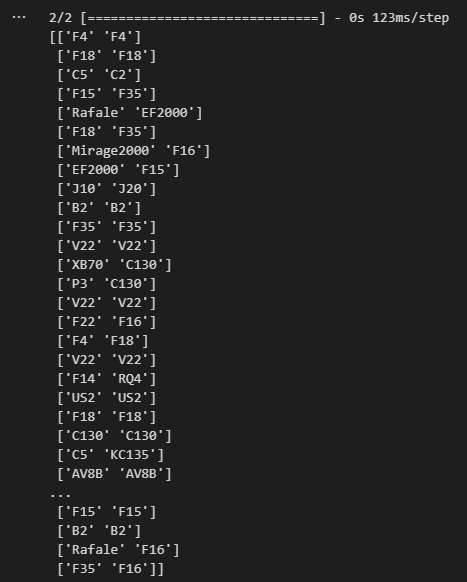

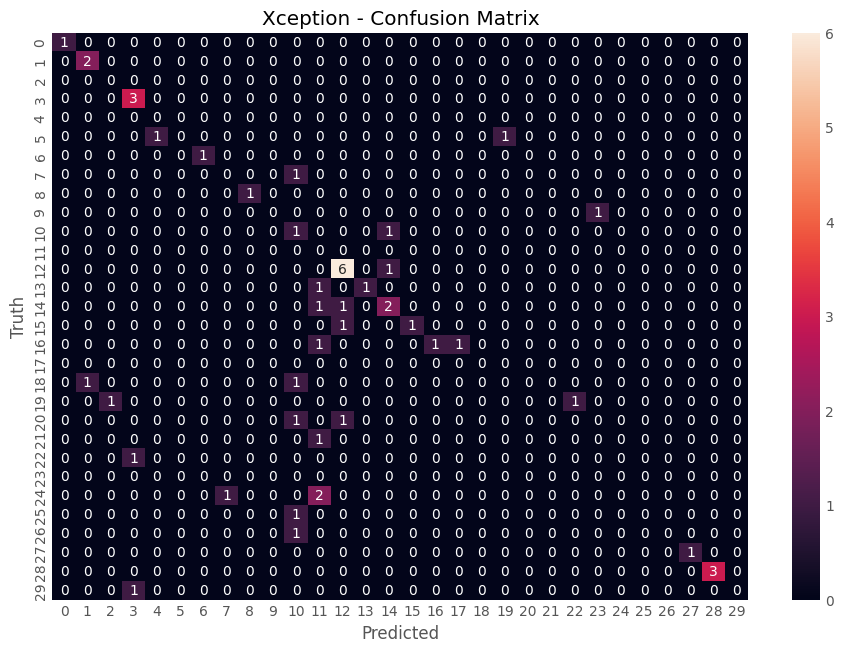

# GAN
### (Generative Adversarial Network)

Na koniec podjąłem się również próby wytrenowania algorytmu do generowania obrazów na podstawie mojej bazy danych.
W tym celu przeprowadziłem bardziej dogłębny preprocessing. 
- przekonwertowałem zdjęcia do skali szarości 
- dodałem dodatkowy wymiar do tablicy
- przekształciłem obrazy do mniejszych rozmiarów (28, 28)
- znormalizowałem piksele skalując je do wartości [-1, 1]

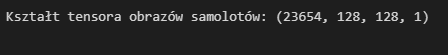

Definiuję dwa modele: generator i dyskryminator. Generator jest siecią neuronową, która bierze wektor szumów jako wejście i generuje obraz. Dyskryminator jest inną siecią neuronową, która bierze obraz jako wejście i próbuje określić, czy obraz jest prawdziwy (z prawdziwego zestawu danych) czy fałszywy (wygenerowany przez generator).

Następnie tworzę model GAN, który łączy generator i dyskryminator. W tym modelu, generator generuje obraz z wektora szumów, a dyskryminator próbuje określić, czy ten obraz jest prawdziwy czy fałszywy.


### I

Przy pierwszej próbie wykorzystałem zdjęcia przekonwertowane na małe rozmiary, (28, 28), oraz dobrałem 10000 epok.

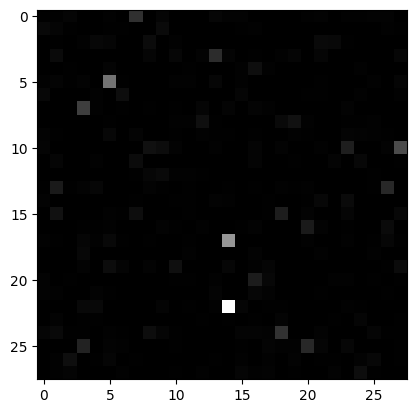

Efekty nie były zadowalające, mimo wielu epok (w porównaniu do poprzednich eksperymentów), rozmiar obrazków okazał się ewidentnie za mały.

### II

Przy drugiej próbie zwiększyłem rozmiar zdjęć ze zbioru treningowego do (128, 128), ale zmniejszyłem też liczbę epok do 1000.

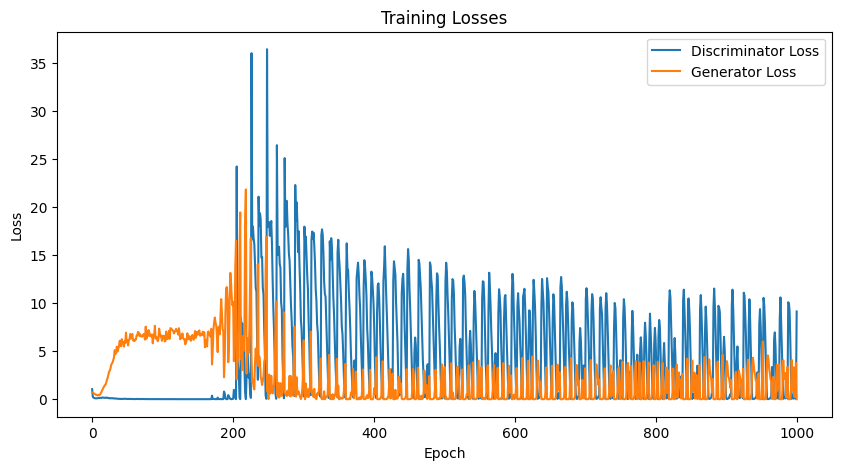



Z wykresu wynika że w pierwszych 200 epokach strata osiąga najwyższe wartości. Wtedy też wartości dla Generatora przewyższają te dla Dyskryminatora, a więc Dyskryminator jest zbyt silny. Z kolei po przekroczeniu 200 epok sytuacja jest odwrotna, strata generatora utzymuje się stabilnie niżej niż strata dyskryminatora, co oznacza że generator jest zbyt silny i dyskryminator ma trudności z odróżnieniem prawdziwych obrazów od fałszywych. W idealnej sytuacji wartości te byłyby równe.

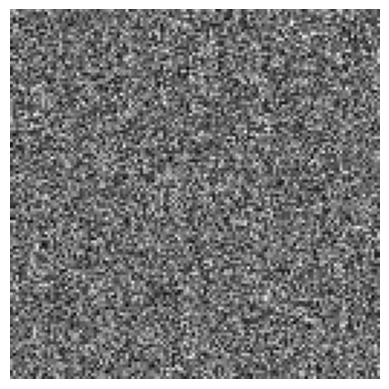

Zwiększona rozdzielczość pozwoliła na oddanie większej ilości detali oraz jasności, lecz wygenerowane zdjęcie nadal niczego nie przypomina.

### III

Na koniec zostawiłem algorytm na dłużej, z większymi zdjęciami przy 10'000 epok. 

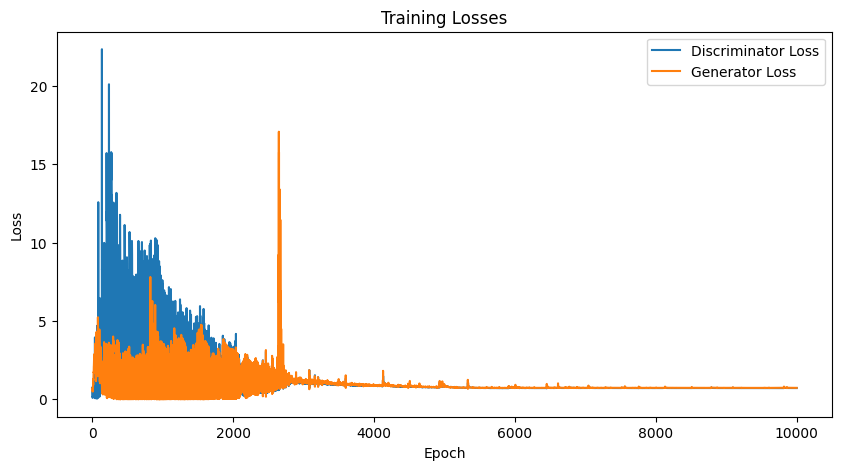

Tutaj do 2000 epok generator ma wyraźną przewagę na dyskryminatorem. Później zaś sytuacja ponownie się odwraca, mój model wyraźnie ma daleko do wyrównania tych wartości.

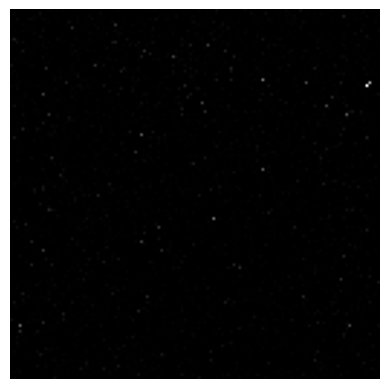

Wygenerowane zdjęcie przypomina gwieździste niebo, lecz niestety nie samolot. Ostatecznie można stwierdzić że dobrany przeze mnie model był zbyt prosty na zdjęcia z większą ilością detali. 

#### Bibliografia

GAN:
https://blog.ovhcloud.com/understanding-image-generation-beginner-guide-generative-adversarial-networks-gan/
https://kaushiklade27.medium.com/image-generation-using-generative-adversarial-networks-gans-cd82afd71597
https://algoscale.com/blog/how-to-use-gan-to-generate-images/
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

Baza Danych:
https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset/data

Wykłady, wcześniejsze zadania oraz pytania do AI.